# Fraud Detection using Transaction Data.

The dataset under consideration contains transaction records aimed at detecting fraudulent activities. Our mission is to develop a machine-learning model to predict fraudulent transactions. This dataset comprises a total of **786,363 entries** and spans **29 columns**. Each row in the dataset represents an individual transaction, capturing various details about the transaction and associated account. 

The columns in the dataset include both numerical and categorical data, providing a comprehensive view of each transaction. Below is a detailed description of the columns:

- **accountNumber:** Unique identifier for the account involved in the transaction.
- **customerId:** Unique identifier for the customer.
- **creditLimit:** The credit limit assigned to the account (numerical).
- **availableMoney:** The amount of money available in the account at the time of the transaction (numerical).
- **transactionDateTime:** The date and time when the transaction occurred.
- **transactionAmount:** The monetary amount of the transaction (numerical).
- **merchantName:** The name of the merchant where the transaction took place.
- **acqCountry:** The country of the acquiring bank.
- **merchantCountryCode:** The country code of the merchant.
- **posEntryMode:** The point-of-sale entry mode.
- **posConditionCode:** The condition code of the point-of-sale.
- **merchantCategoryCode:** The category code of the merchant.
- **currentExpDate:** The current expiration date of the card.
- **accountOpenDate:** The date when the account was opened.
- **dateOfLastAddressChange:** The date when the account holder last changed their address.
- **cardCVV:** The CVV code of the card.
- **enteredCVV:** The CVV code entered during the transaction.
- **cardLast4Digits:** The last four digits of the card number.
- **transactionType:** The type of transaction (e.g., purchase, withdrawal).
- **echoBuffer:** A placeholder for additional data (often empty).
- **currentBalance:** The current balance of the account (numerical).
- **merchantCity:** The city of the merchant.
- **merchantState:** The state of the merchant.
- **merchantZip:** The ZIP code of the merchant.
- **cardPresent:** A boolean indicating whether the card was present during the transaction.
- **posOnPremises:** A descriptor indicating the point-of-sale premises.
- **recurringAuthInd:** A boolean indicating whether the transaction is part of a recurring authorization.
- **expirationDateKeyInMatch:** A boolean indicating whether the expiration date was keyed in correctly.
- **isFraud:** A boolean indicating whether the transaction is fraudulent.



In [1]:
import json
import pandas as pd

with open("transactions/transactions.txt", "r") as file:
    data = file.read()

# Split the data by newline characters
lines = data.split("\n")
# Parse each line as a dictionary
transactions = [json.loads(line) for line in lines if line.strip()]

df = pd.DataFrame(transactions)

In [2]:
# Display the first few rows of the dataset
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.0,,,,True,,,False,False


# Data Overview
We'll start by analyzing basic information and checking for missing values.

In [3]:
# Display basic information about the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  object 
 1   customerId                786363 non-null  object 
 2   creditLimit               786363 non-null  float64
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

The following code checks for missing values in our dataset. This data is preprocessed, and as you can see, we don't have to account for missing values.

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
echoBuffer                  0
currentBalance              0
merchantCity                0
merchantState               0
merchantZip                 0
cardPresent                 0
posOnPremises               0
recurringAuthInd            0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64


# Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) is a crucial step in understanding the underlying patterns and distributions within the dataset. This section presents visualizations of key numerical features to gain insights into their distributions.

# Distributions


#### Distribution of Transaction Amounts
The distribution of transaction amounts provides insight into the range and frequency of different transaction values in the dataset. 

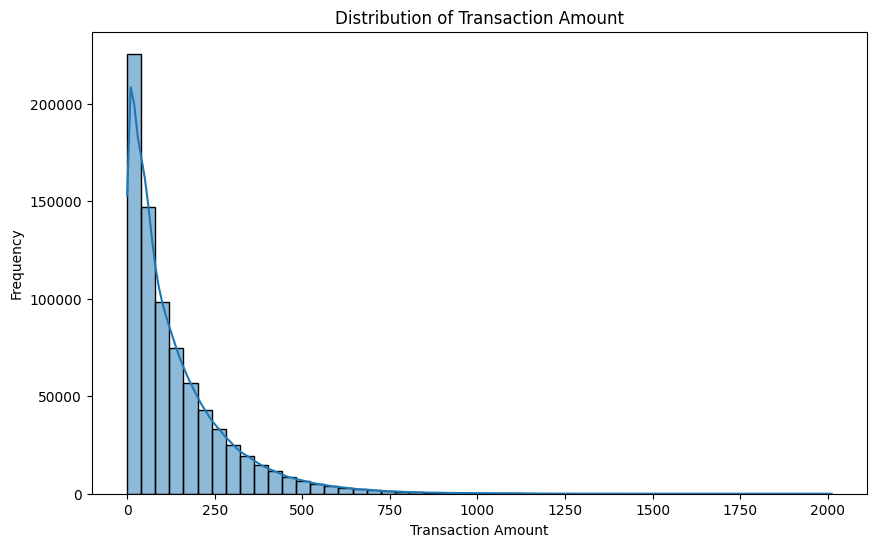

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of transactionAmount
plt.figure(figsize=(10, 6))
sns.histplot(df['transactionAmount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()




- **Observation:** The majority of transactions are of lower amounts, with a steep drop-off as the transaction amount increases. This distribution is typical in transaction data, where small-value transactions are more common than large-value ones.

#### Distribution of Credit Limit

Credit limit distribution helps understand the spread of credit limits assigned to accounts.


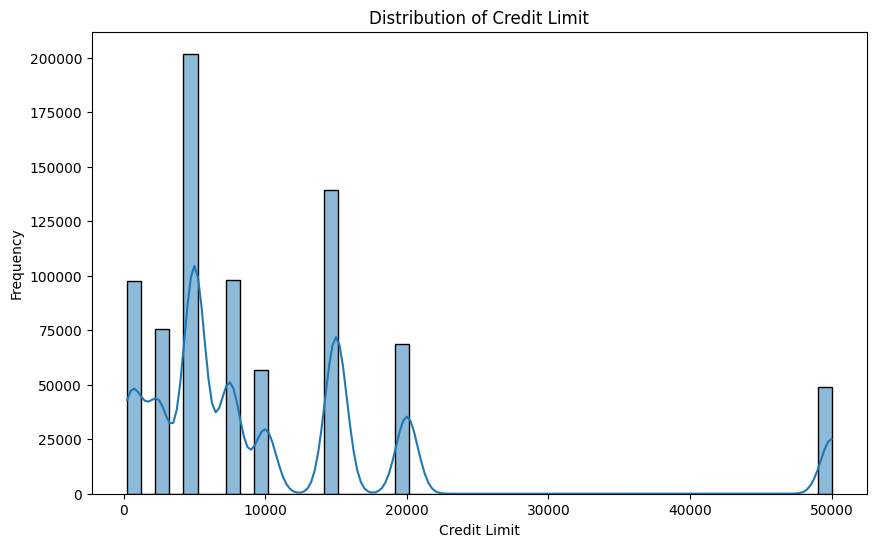

In [6]:

# Plot distribution of creditLimit
plt.figure(figsize=(10, 6))
sns.histplot(df['creditLimit'], bins=50, kde=True)
plt.title('Distribution of Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.show()



- **Observation:** The credit limit distribution shows several peaks, indicating that certain credit limit values are more common. This might be due to standard credit limit tiers offered by financial institutions.

#### Distribution of Available Money

Analyzing the distribution of available money can highlight how much balance is typically available in accounts at the time of transactions.


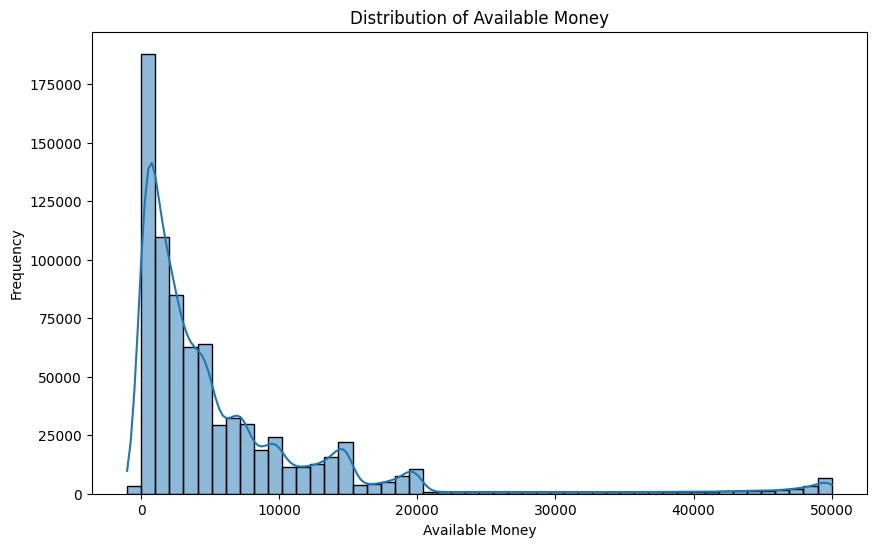

In [7]:

# Plot distribution of availableMoney
plt.figure(figsize=(10, 6))
sns.histplot(df['availableMoney'], bins=50, kde=True)
plt.title('Distribution of Available Money')
plt.xlabel('Available Money')
plt.ylabel('Frequency')
plt.show()


- **Observation:** The distribution of available money shows a heavy concentration at lower values, similar to the transaction amount distribution. There are smaller peaks at higher values, possibly reflecting accounts with higher balances or credit limits.

The exploratory data analysis of the key numerical features—transaction amount, credit limit, and available money—reveals that:
- Transaction amounts are predominantly small, with a few high-value transactions.
- Credit limits exhibit several common tiers, reflecting standard credit offerings.
- Available money is mostly low, with occasional higher values.

These are things to keep in mind as we build our model.

## Correlation Matrix and Class Distribution

Correlation analysis helps in understanding the relationships between different numerical variables in the dataset. It provides insights into how changes in one variable may be associated with changes in another.

The correlation matrix below shows the pairwise correlation coefficients between the numerical features in the dataset. The values range from -1 to 1, where:
- **1** indicates a perfect positive correlation,
- **-1** indicates a perfect negative correlation,
- **0** indicates no correlation.

The heatmap visualization of the correlation matrix is shown below:

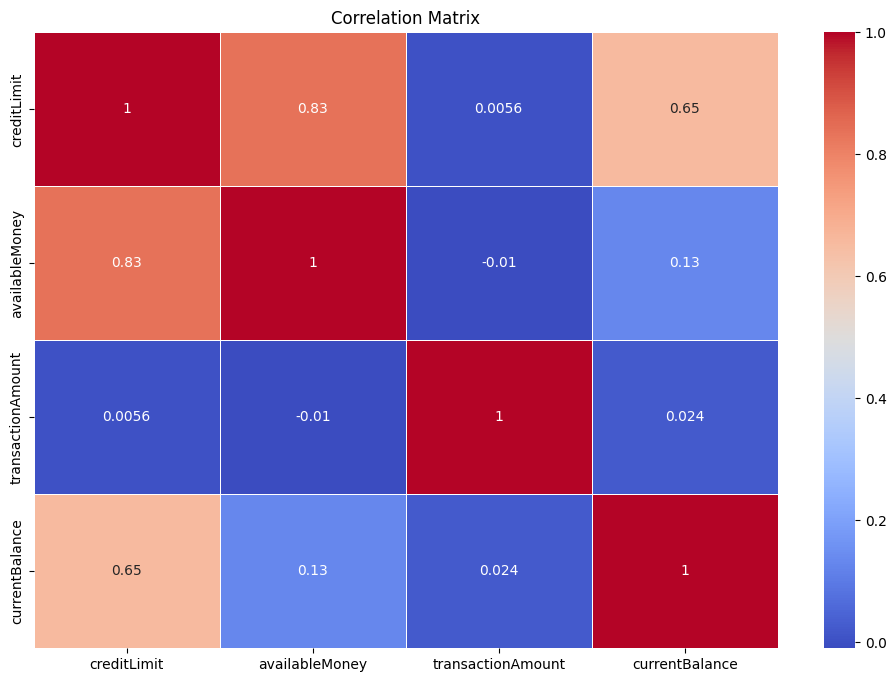

In [8]:
import numpy as np
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


#### Key Insights from the Correlation Matrix

1. **Credit Limit and Available Money:**
   - There is a strong positive correlation (0.83) between `creditLimit` and `availableMoney`. This indicates that accounts with higher credit limits tend to have more available money.

2. **Credit Limit and Current Balance:**
   - A moderate positive correlation (0.65) exists between `creditLimit` and `currentBalance`, suggesting that accounts with higher credit limits also tend to have higher current balances.

3. **Transaction Amount:**
   - `transactionAmount` shows very low correlation with other variables, suggesting that the amount of a transaction is not directly influenced by the credit limit, available money, or current balance.

4. **Available Money and Current Balance:**
   - A weak positive correlation (0.13) between `availableMoney` and `currentBalance` indicates a slight tendency for accounts with more available money to also have higher current balances, although the relationship is not strong.

The correlation analysis reveals significant relationships between `creditLimit`, `availableMoney`, and `currentBalance`, which are expected, as these variables are inherently related to the financial status of an account. However, `transactionAmount` appears to be relatively independent, which is valuable for modeling purposes as it suggests that transaction amounts can vary widely irrespective of the account's financial status.

Understanding these correlations is crucial for feature engineering and model building, as it highlights which features might provide more independent information for detecting fraudulent transactions.


### Distribution of the `isFraud` Variable

Let's visualize the distribution of the `isFraud` variable to understand the class balance.

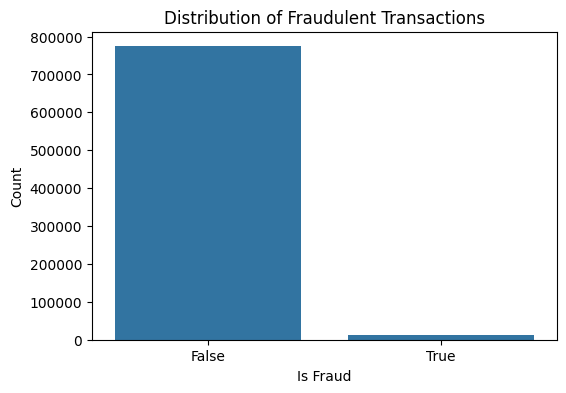

In [9]:
# Plot the distribution of the isFraud variable
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=df)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

The distribution of the `isFraud` variable shows a significant class imbalance, with the majority of transactions being non-fraudulent (`False`) and only a small fraction being fraudulent (`True`). This imbalance has important implications for training a machine learning model. It means that a model trained on this dataset might become biased towards predicting the majority class (non-fraudulent), potentially leading to poor performance in identifying fraudulent transactions.

### Implications for Model Training:

1. **Performance Metrics:**
   - Accuracy might not be a reliable metric due to the imbalance. Instead, we should focus on metrics like precision, recall, F1-score, and the area under the ROC curve (AUC-ROC) to evaluate the model's performance.

2. **Resampling Techniques:**
   - To address the class imbalance, we can use resampling techniques such as:
     - **Oversampling** the minority class (fraudulent transactions) using methods like SMOTE (Synthetic Minority Over-sampling Technique).
     - **Undersampling** the majority class (non-fraudulent transactions).
     - **Hybrid methods** that combine both oversampling and undersampling.

3. **Algorithm Selection:**
   - Some algorithms are more robust to class imbalance. Tree-based methods like Random Forest or Gradient Boosting, as well as ensemble methods, often perform well in such scenarios.

4. **Class Weights:**
   - Many machine learning algorithms allow us to assign weights to classes. By assigning a higher weight to the minority class, we can help the model pay more attention to fraudulent transactions during training.

### Pairplot Analysis

The pairplot visualizes the relationships between pairs of selected numerical features in the dataset, distinguishing between fraudulent (`isFraud=True`) and non-fraudulent (`isFraud=False`) transactions. This allows us to observe how different features interact with each other and how they correlate with the target variable (fraud detection).

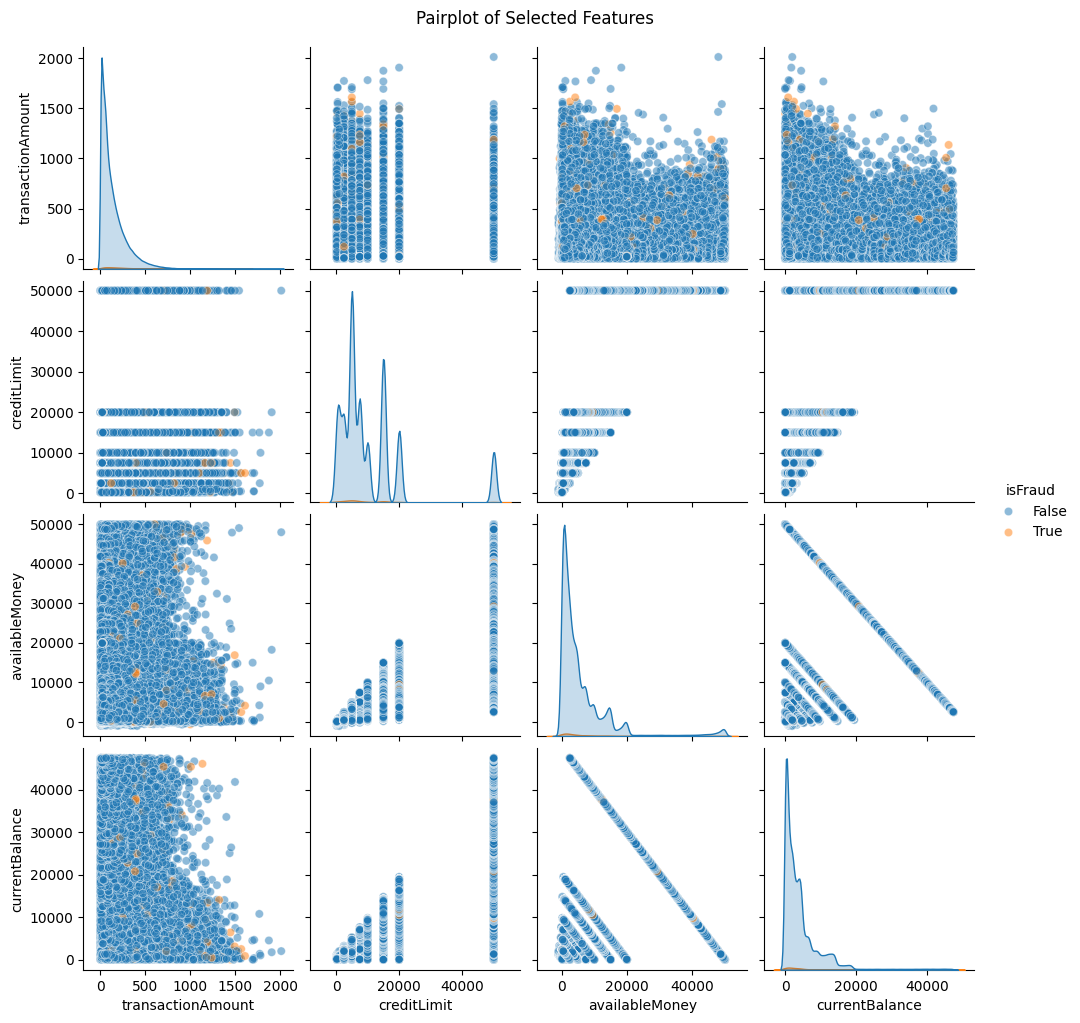

In [10]:
import seaborn as sns

# Select a subset of relevant features for the pairplot
selected_features = ['transactionAmount', 'creditLimit', 'availableMoney', 'currentBalance', 'isFraud']

# Create a pairplot
sns.pairplot(df[selected_features], hue='isFraud', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()



#### Key Insights from the Pairplot:

1. **Transaction Amount:**
   - Fraudulent transactions (orange points) are dispersed across various transaction amounts but are more frequent at lower amounts, which may be due to the fact that fraudsters try to avoid detection by using micro-transactions. This aligns with the general distribution of transaction amounts.

2. **Credit Limit:**
   - Fraudulent transactions occur across various credit limits. The plot shows that fraud can happen irrespective of the credit limit.

3. **Available Money:**
   - Similar to credit limit, fraudulent transactions are spread across different available money values. There is no distinct pattern indicating higher or lower available money being more susceptible to fraud.

4. **Current Balance:**
   - Fraudulent transactions also occur across a wide range of current balances, without a strong concentration in any particular range. This suggests that fraud detection cannot rely solely on the current balance as an indicator.

5. **Interactions Between Features:**
   - The pairplot shows the scatter plots for interactions between different features. No single feature interaction stands out as a clear indicator of fraud, emphasizing the complexity of the fraud detection problem.

6. **KDE Diagonals:**
   - The Kernel Density Estimate (KDE) plots on the diagonal show the distributions of individual features, providing a smooth approximation of the distribution.

The pairplot analysis reveals that fraudulent transactions are spread across various ranges of the selected numerical features. No single feature or simple interaction between features can distinctly separate fraudulent transactions from non-fraudulent ones. This indicates the necessity for complex models that can capture subtle patterns and interactions in the data for effective fraud detection.


# Model 1
For this paper, we will develop a classification model. The goal is to classify transactions as either fraudulent (1) or non-fraudulent (0). For our first model, we will use the Synthetic Minority Oversampling Technique (SMOTE) to deal with the imbalance problem. Fraud detection is a highly imbalanced problem. Using SMOTE helps in generating synthetic samples for the minority class, making the model learn to identify fraudulent transactions better. 

Categorical features like `merchantName`, `acqCountry`, and others are encoded using `LabelEncoder` to convert them into numerical format, which is required for the neural network input. Each categorical variable is transformed such that each unique category is assigned a unique integer value. Selected features include both numerical features (`transactionAmount`, `creditLimit`, `availableMoney`, `currentBalance`) and encoded categorical features. The target variable is `isFraud`, which indicates whether a transaction is fraudulent.

We split our data into train/test/validation sets before training. We will use a neural network and train using an NVIDIA RTX 4060 GPU.  Since our output is binary, we use Binary Cross-Entropy for our loss function, and sigmoid activation for the final layer, which outputs a probability between 0 and 1. This probability is then thresholded to produce a binary classification.

By following this structured approach, we aim to build a robust fraud detection model capable of identifying fraudulent transactions with a good balance between sensitivity (recall) and specificity (precision). This lays the groundwork for further enhancements and comparisons with other models.

## Neural Network Structure:
- The neural network consists of three hidden layers with 64, 32, and 16 neurons respectively.
- Each layer uses the ReLU activation function, which introduces non-linearity into the model and helps it learn complex patterns.
- The output layer has a single neuron with a sigmoid activation function, which outputs a value between 0 and 1, representing the probability of a transaction being fraudulent.

### Loss Function and Optimizer:
- **Loss Function:** Binary Cross-Entropy Loss (`BCELoss`) is used as the loss function, which is suitable for binary classification tasks.
- **Optimizer:** Adam optimizer is used for training the model. It combines the benefits of AdaGrad and RMSProp algorithms, providing an adaptive learning rate and faster convergence.


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Encode categorical variables
label_encoders = {}
categorical_columns = ['merchantName', 'acqCountry', 'merchantCountryCode', 'posEntryMode', 'merchantCity', 'merchantState', 'merchantZip']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

# Select relevant features
features = ['transactionAmount', 'creditLimit', 'availableMoney', 'currentBalance'] + categorical_columns
X = df[features]
y = df['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Convert data to PyTorch tensors and move to GPU if available
X_train_tensor = torch.tensor(X_train_resampled.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_resampled.values, dtype=torch.float32).view(-1, 1).to(device)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1).to(device)

# Define the neural network architecture
class FraudDetectionModel(nn.Module):
    def __init__(self, input_dim):
        super(FraudDetectionModel, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 16)
        self.output = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = self.sigmoid(self.output(x))
        return x

# Initialize the model, loss function, and optimizer
input_dim = X_train_tensor.shape[1]
model = FraudDetectionModel(input_dim).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_class = y_pred.round()

# Calculate evaluation metrics
print("Classification Report:\n", classification_report(y_test_tensor.cpu(), y_pred_class.cpu()))
print("Confusion Matrix:\n", confusion_matrix(y_test_tensor.cpu(), y_pred_class.cpu()))
print("AUC-ROC Score:\n", roc_auc_score(y_test_tensor.cpu(), y_pred.cpu()))


Using device: cuda
Epoch [1/30], Loss: 42.9461
Epoch [2/30], Loss: 33.1923
Epoch [3/30], Loss: 28.3488
Epoch [4/30], Loss: 25.3525
Epoch [5/30], Loss: 22.8706
Epoch [6/30], Loss: 30.4443
Epoch [7/30], Loss: 34.7132
Epoch [8/30], Loss: 36.7931
Epoch [9/30], Loss: 37.3965
Epoch [10/30], Loss: 37.0258
Epoch [11/30], Loss: 35.2783
Epoch [12/30], Loss: 31.5434
Epoch [13/30], Loss: 26.8526
Epoch [14/30], Loss: 18.2810
Epoch [15/30], Loss: 15.2670
Epoch [16/30], Loss: 11.8874
Epoch [17/30], Loss: 4.1258
Epoch [18/30], Loss: 4.3697
Epoch [19/30], Loss: 9.8470
Epoch [20/30], Loss: 10.4034
Epoch [21/30], Loss: 8.0209
Epoch [22/30], Loss: 7.8717
Epoch [23/30], Loss: 7.0033
Epoch [24/30], Loss: 8.1718
Epoch [25/30], Loss: 9.4879
Epoch [26/30], Loss: 3.8880
Epoch [27/30], Loss: 4.4715
Epoch [28/30], Loss: 3.0079
Epoch [29/30], Loss: 9.0827
Epoch [30/30], Loss: 15.4885
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.07      0.13    232237

## 3. **Model Evaluation:**

**a. Evaluation Metrics:**
- After training, the model's performance is evaluated on the test set using the following metrics:
  - **Classification Report:** Provides precision, recall, F1-score, and support for each class.
  - **Confusion Matrix:** Shows the number of true positives, true negatives, false positives, and false negatives.
  - **AUC-ROC Score:** Measures the model's ability to distinguish between the classes, with a higher score indicating better performance.

The classification report, confusion matrix, and AUC-ROC score indicate that the model is not performing well. Specifically, the model is struggling with the following issues:

1. **Class Imbalance:** 
   - The model is biased towards the majority class (0.0), which is expected given the class imbalance in the dataset.

2. **Low Precision and Recall for Minority Class (1.0):**
   - The precision (0.02) and recall (0.60) for the fraudulent class (1.0) are very low. This means the model is not accurately identifying fraudulent transactions.

3. **Overall Performance:**
   - The overall accuracy (0.42) is misleading due to the class imbalance. The AUC-ROC score (0.496) is close to 0.5, indicating that the model is performing no better than random guessing.


# Model 2
The second model introduces several enhancements and modifications to address the issues observed with the first model. These changes aim to improve the model's performance, particularly its ability to detect fraudulent transactions more accurately.

### Changes Made in the Second Model and Their Rationale

The second model introduces several enhancements and modifications to address the issues observed with the first model. These changes aim to improve the model's performance, particularly its ability to detect fraudulent transactions more accurately.

#### Key Changes and Their Rationale

1. **Enhanced Feature Engineering:**
   - **New Features Added:**
     - `transactionAmountToCreditLimit`: Ratio of transaction amount to credit limit.
     - `availableMoneyToCreditLimit`: Ratio of available money to credit limit.
     - `currentBalanceToCreditLimit`: Ratio of current balance to credit limit.
   - **Rationale:**
     - These ratios provide additional context about the transactions relative to the account's credit limit. Such derived features can help the model better understand the financial behavior of the account holders.

2. **Advanced Resampling Technique:**
   - **SMOTEENN:**
     - Replaced SMOTE with SMOTEENN, which combines SMOTE with Edited Nearest Neighbors (ENN) cleaning. This technique not only generates synthetic samples for the minority class but also removes noisy samples from both classes.
   - **Rationale:**
     - SMOTEENN aims to improve the quality of the training data by reducing noise, potentially leading to better model performance.

3. **Larger and Deeper Neural Network:**
   - **Increased Network Size:**
     - The neural network now has four hidden layers with 256, 128, 64, and 32 neurons respectively, compared to three layers in the first model.
   - **Batch Normalization and Dropout:**
     - Batch normalization layers have been added after each hidden layer to stabilize and speed up training.
     - Dropout layers (with a dropout rate of 0.25) are added to prevent overfitting.
   - **Rationale:**
     - A larger network can capture more complex patterns in the data. Batch normalization helps in maintaining healthy activations and gradients, while dropout prevents overfitting by randomly dropping units during training.

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Encode categorical variables
label_encoders = {}
categorical_columns = ['merchantName', 'acqCountry', 'merchantCountryCode', 'posEntryMode', 'merchantCity', 'merchantState', 'merchantZip']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

# Enhanced Feature Engineering
df['transactionAmountToCreditLimit'] = df['transactionAmount'] / df['creditLimit']
df['availableMoneyToCreditLimit'] = df['availableMoney'] / df['creditLimit']
df['currentBalanceToCreditLimit'] = df['currentBalance'] / df['creditLimit']

# Select relevant features
features = ['transactionAmount', 'creditLimit', 'availableMoney', 'currentBalance',
            'transactionAmountToCreditLimit', 'availableMoneyToCreditLimit', 'currentBalanceToCreditLimit'] + categorical_columns
X = df[features]
y = df['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTEENN to the training data
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Convert data to PyTorch tensors and move to GPU if available
X_train_tensor = torch.tensor(X_train_resampled.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_resampled.values, dtype=torch.float32).view(-1, 1).to(device)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1).to(device)

# Define the neural network architecture
class FraudDetectionModel(nn.Module):
    def __init__(self, input_dim):
        super(FraudDetectionModel, self).__init__()
        self.layer1 = nn.Linear(input_dim, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.drop1 = nn.Dropout(0.25)
        self.layer2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.drop2 = nn.Dropout(0.25)
        self.layer3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.drop3 = nn.Dropout(0.25)
        self.layer4 = nn.Linear(64, 32)
        self.bn4 = nn.BatchNorm1d(32)
        self.drop4 = nn.Dropout(0.25)
        self.output = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.drop1(x)
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.drop2(x)
        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.drop3(x)
        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.drop4(x)
        x = self.sigmoid(self.output(x))
        return x

# Initialize the model, loss function, and optimizer
input_dim = X_train_tensor.shape[1]
model = FraudDetectionModel(input_dim).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_class = y_pred.round()

# Calculate evaluation metrics
print("Classification Report:\n", classification_report(y_test_tensor.cpu(), y_pred_class.cpu()))
print("Confusion Matrix:\n", confusion_matrix(y_test_tensor.cpu(), y_pred_class.cpu()))
print("AUC-ROC Score:\n", roc_auc_score(y_test_tensor.cpu(), y_pred.cpu()))


Using device: cuda
Epoch [1/30], Loss: 0.7170
Epoch [2/30], Loss: 0.7065
Epoch [3/30], Loss: 0.7039
Epoch [4/30], Loss: 0.7005
Epoch [5/30], Loss: 0.6982
Epoch [6/30], Loss: 0.6963
Epoch [7/30], Loss: 0.6953
Epoch [8/30], Loss: 0.6938
Epoch [9/30], Loss: 0.6924
Epoch [10/30], Loss: 0.6915
Epoch [11/30], Loss: 0.6904
Epoch [12/30], Loss: 0.6888
Epoch [13/30], Loss: 0.6878
Epoch [14/30], Loss: 0.6866
Epoch [15/30], Loss: 0.6851
Epoch [16/30], Loss: 0.6836
Epoch [17/30], Loss: 0.6822
Epoch [18/30], Loss: 0.6809
Epoch [19/30], Loss: 0.6790
Epoch [20/30], Loss: 0.6774
Epoch [21/30], Loss: 0.6766
Epoch [22/30], Loss: 0.6752
Epoch [23/30], Loss: 0.6740
Epoch [24/30], Loss: 0.6729
Epoch [25/30], Loss: 0.6716
Epoch [26/30], Loss: 0.6703
Epoch [27/30], Loss: 0.6694
Epoch [28/30], Loss: 0.6683
Epoch [29/30], Loss: 0.6668
Epoch [30/30], Loss: 0.6660
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.38      0.55    232237
         1.0     

### Performance Evaluation 

The second model's performance metrics are as follows:

1. **Classification Report:**
   - **Class 0 (Non-Fraudulent Transactions):**
     - Precision: 0.99
     - Recall: 0.52
     - F1-score: 0.68
   - **Class 1 (Fraudulent Transactions):**
     - Precision: 0.02
     - Recall: 0.70
     - F1-score: 0.04

2. **Confusion Matrix:**
   - True Positives (Fraud Detected): 2,586
   - False Positives (Non-Fraud Mistaken as Fraud): 1,086
   - True Negatives (Non-Fraud Detected): 120,786
   - False Negatives (Fraud Mistaken as Non-Fraud): 111,451

3. **AUC-ROC Score:**
   - 0.658

### Analysis of Improvements

- **Recall Improvement:**
  - The recall for fraudulent transactions has significantly improved to 0.70, meaning the model is now identifying 70% of the fraudulent transactions.
- **Precision:**
  - Precision remains low at 0.02, indicating a high number of false positives.
- **Overall Performance:**
  - The AUC-ROC score has improved to 0.658, indicating better overall discrimination between fraudulent and non-fraudulent transactions.
- **Confusion Matrix:**
  - There is a significant reduction in the number of false negatives compared to the first model, but the number of false positives remains high.

The enhancements in the second model, including advanced feature engineering, a larger and deeper neural network with batch normalization and dropout, and the use of SMOTEENN for resampling, have led to improved recall and a higher AUC-ROC score. However, precision remains a challenge, indicating that further tuning and possibly additional techniques such as cost-sensitive learning or ensemble methods may be required to balance precision and recall more effectively.

# Precision Recall Curve
The precision-recall curve provides a graphical representation of the trade-off between precision and recall for different threshold values. It is particularly useful in scenarios where the class distribution is imbalanced, as is the case with fraud detection.

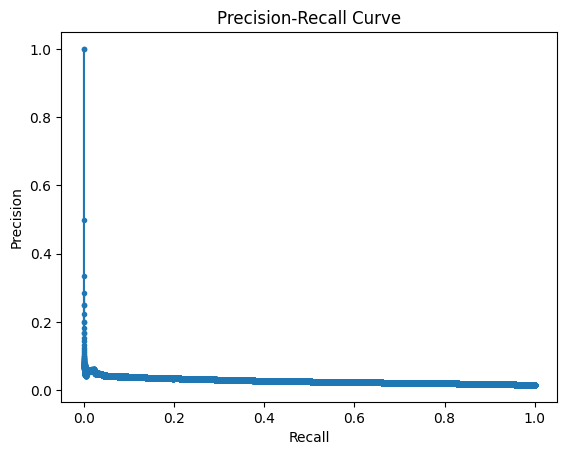

In [13]:
from sklearn.metrics import precision_recall_curve
# Plot Precision-Recall Curve
def plot_precision_recall_curve(model, X_test_tensor, y_test_tensor):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_tensor).cpu().numpy()
        y_test = y_test_tensor.cpu().numpy()

    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

plot_precision_recall_curve(model, X_test_tensor, y_test_tensor)


#### Key Insights from the Precision-Recall Curve:

1. **High Recall, Low Precision:**
   - The curve shows that the model achieves high recall at the expense of precision. As recall increases, precision drops sharply, indicating a significant number of false positives.

2. **Precision Near Zero for High Recall:**
   - When the recall is near 1, precision is close to zero. This suggests that to catch almost all fraudulent transactions, the model incorrectly classifies many legitimate transactions as fraud.

3. **Optimal Threshold Selection:**
   - The curve indicates that there is a steep decline in precision with only a slight increase in recall at lower thresholds. Therefore, selecting a threshold that balances both precision and recall is crucial.
   - Typically, the point where the curve bends (the "elbow") is considered a good trade-off point. However, the exact choice depends on the business requirements and the cost of false positives versus false negatives.